In [1]:
import numpy as np
import pyxdf
import matplotlib.pyplot as plt
from scipy import signal, fftpack


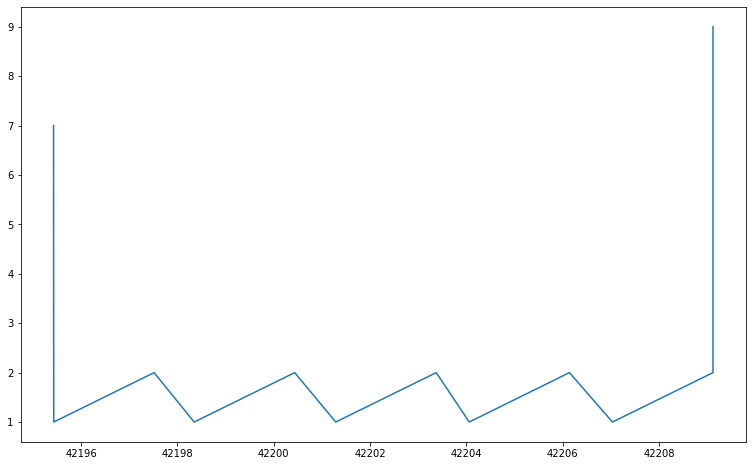

In [7]:
data, header=  pyxdf.load_xdf('recordings/experiment_saturday.xdf')

for stream in data:
    y = stream['time_series']

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.figure(figsize=(13,8))
        plt.plot(stream['time_stamps'][:], y[:])
    else:
        raise RuntimeError('Unknown stream format')



In [8]:
print(stream['time_series'])

[[7]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [1]
 [2]
 [9]]


(12,)
[0.00365567 2.08355426 0.83155267 2.08787076 0.85134151 2.08694481
 0.68426749 2.08060943 0.89237747 2.08806818 0.        ]


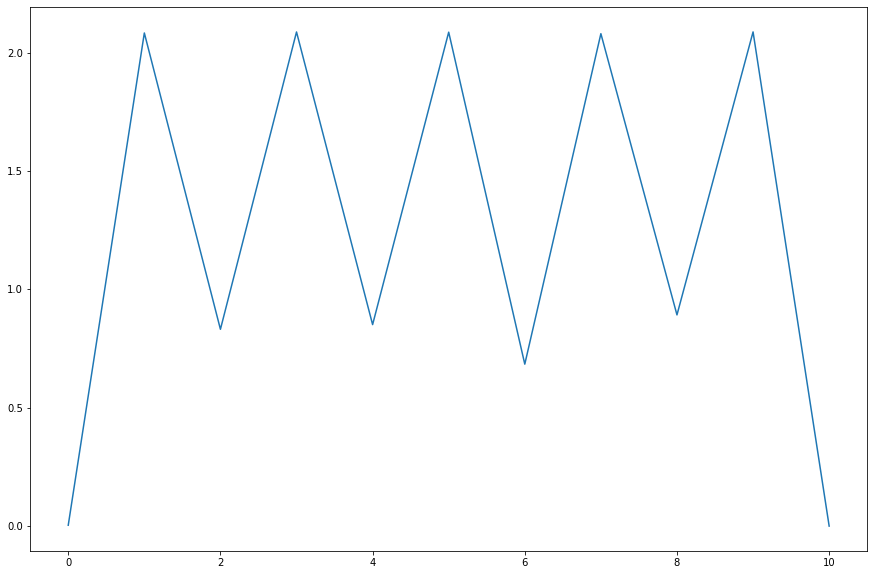

In [9]:
diff_ts = np.diff(stream['time_stamps'])
plt.figure(figsize=(15,10))
# plt.plot(stream['time_stamps'][:10], stream['time_series'][:10])


print(stream['time_stamps'].shape)
plt.plot(np.diff(stream['time_stamps']))
print(np.diff(stream['time_stamps']))

In [15]:
fieldline_data = data[1]['time_series']
stim_adc = fieldline_data[:, 11]
# print(data[0])
# print(fieldline_data.shape)

# plt.plot(fieldline_data[:1000, 4] * 1e-15)
# plt.plot(fieldline_data[:1000, 10] * 1e-15)

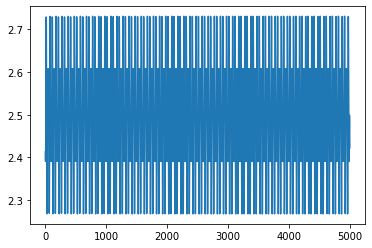

In [16]:
plt.plot(stim_adc[10000:15000])

(0.0, 30.0)

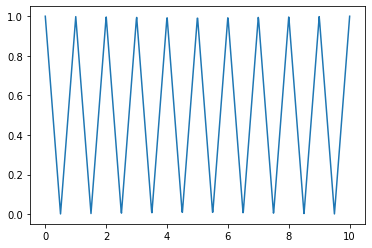

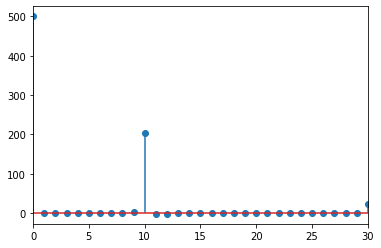

In [245]:

time=np.linspace(0, 10, 1000)
# print(time)
freq=1
tri=np.abs(signal.sawtooth(2 * np.pi * freq * time)) 
plt.plot(time,tri)


fou = fftpack.fft(tri)
freqs = fftpack.fftfreq(tri.shape[0]) * 1000

plt.figure()
plt.stem(freqs, fou.real)
plt.xlim(0,30)

